In [249]:
%matplotlib notebook 
import numpy as np
from scipy import linalg
import scipy
import scipy.linalg
import matplotlib.pyplot as plt
from tabulate import tabulate
import sympy as sy
from mpl_toolkits.mplot3d import Axes3D

In [250]:
def char_pol(b, sig, r, lam):
    return lam**3+(1+b+sig)*lam**2+b*(sig+r)*lam+2*sig*b*(r-1)

<IPython.core.display.Javascript object>


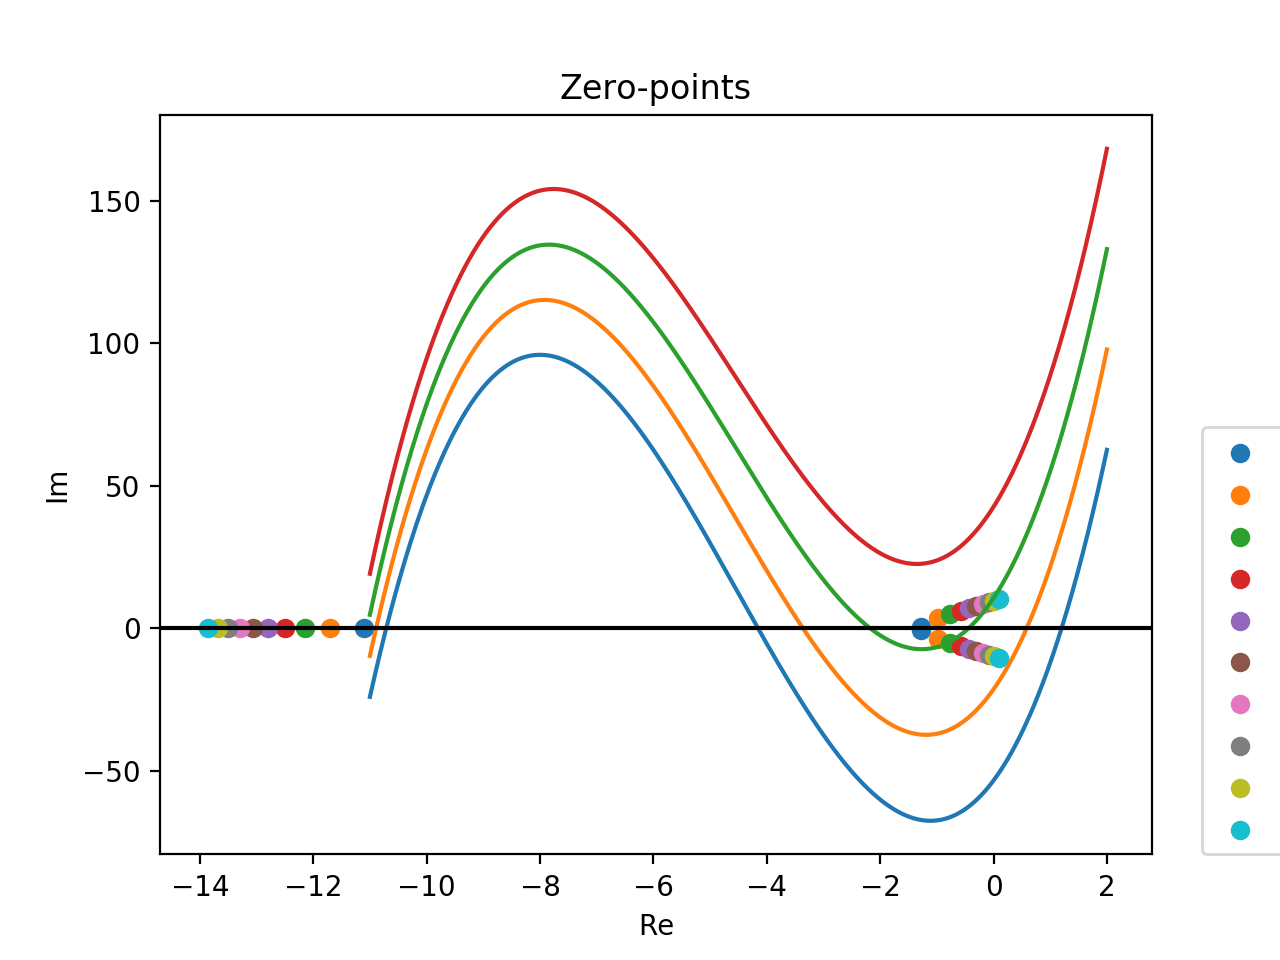

In [251]:
sig = 10
b = 8/3
r = np.linspace(0, 1.8, 4)
fig, ax = plt.subplots()
lam = np.linspace(-11, 2, 1000)
for i in r:
    ax.plot(lam, char_pol(b, sig, i, lam))
ax.grid(True, which='both')

ax.axhline(y=0, color='k')

In [252]:
def zero_solver(sig, b, r1, f):
    x = sy.symbols("x")
    eq = sy.Eq(f(b, sig, r1, x), 0)
    sol = sy.solve(eq)
    return [sy.re(x) for x in sol], [sy.im(x)  for x in sol]

Text(0.5, 1.0, 'Zero-points')

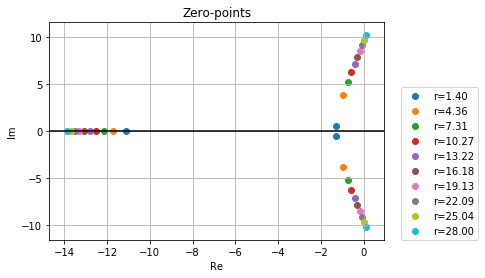

In [270]:
r1 = np.linspace(1.4 ,28, 10)
for i in r1:
    X, Y = zero_solver(sig, b, i, char_pol)
    plt.scatter(X, Y, label='r={:.2f}'.format(i))
plt.grid()
plt.legend(loc=(1.05,0))
plt.xlabel('Re')
plt.ylabel('Im')
plt.axhline(y=0, color='k')
plt.title('Zero-points')

In [254]:
def rk4_step(y0, x0, f, h, f_args = {}):
    k1 = h * f(y0, x0, **f_args)
    k2 = h * f(y0 + k1/2., x0 + h/2., **f_args)
    k3 = h * f(y0 + k2/2., x0 + h/2., **f_args)
    k4 = h * f(y0 + k3, x0 + h, **f_args)
    
    xp1 = x0 + h
    yp1 = y0 + 1./6.*(k1 + 2.*k2 + 2.*k3 + k4)
    
    return(yp1,xp1)

def rk4(y0, x0, f, h, n, f_args = {}):
    yn = np.zeros((n+1, y0.shape[0]))
    xn = np.zeros(n+1)
    yn[0,:] = y0
    xn[0] = x0
    
    for n in np.arange(1,n+1,1):
        yn[n,:], xn[n] = rk4_step(y0 = yn[n-1,:], x0 = xn[n-1], f = f, h = h, f_args = f_args)
        
    return(yn, xn)

In [306]:
def func(vector, x0, r):
    dx =  -sig*(vector[0]-vector[1])
    dy = r*vector[0] - vector[1] - vector[0]*vector[2]
    dz = vector[0]*vector[1] - b*vector[2]
    return np.array([dx, dy, dz])

def start(r):
    if r<1:
        return np.array([0.1, 0.1, 0.1])
    else:
        a0 = np.sqrt(b*(r-1))
        return np.array([a0+0.1, a0+0.1, r-1+0.1])
    
    

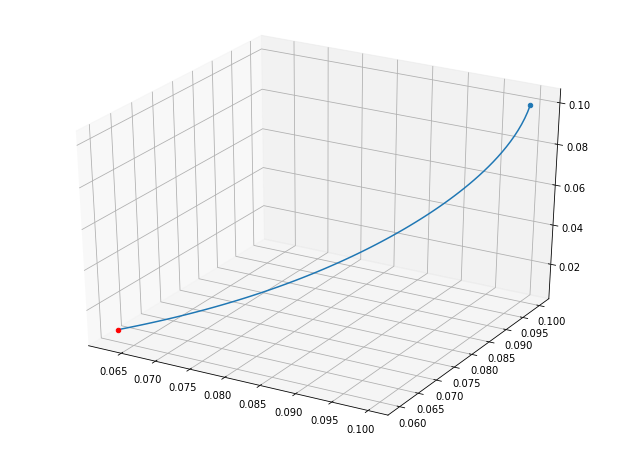

In [285]:
h = 0.01
fig = plt.figure(figsize=(11,8))

r_s = np.array([0.5, 1.17, 1.3456, 25.0, 29.0])
steps = 100

y, x = rk4(start(r_s[0]), np.array([0]), func, h, steps, f_args={"r":r_s[0]})
ax=plt.subplot(projection="3d")
ax.plot(y[:,0], y[:,1], y[:,2])
ax.scatter(y[0][0], y[0][1], y[0][2])
ax.scatter(y[-1][0], y[-1][1], y[-1][2], color="red")

2.6666666666666665 1.17
0.6733003292241384


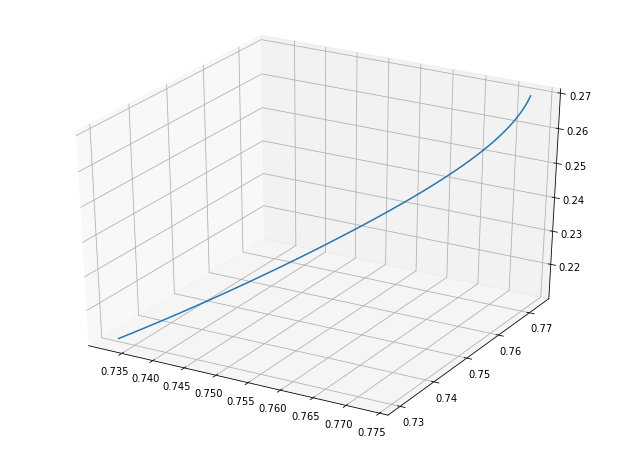

In [272]:
fig = plt.figure(figsize=(11,8))
y, x = rk4(start(r_s[1]), np.array([0]), func, h, 100, f_args={"r":r_s[1]})
ax=plt.subplot(projection="3d")
ax.plot(y[:,0], y[:,1], y[:,2])

2.6666666666666665 1.3456
0.9599999999999999


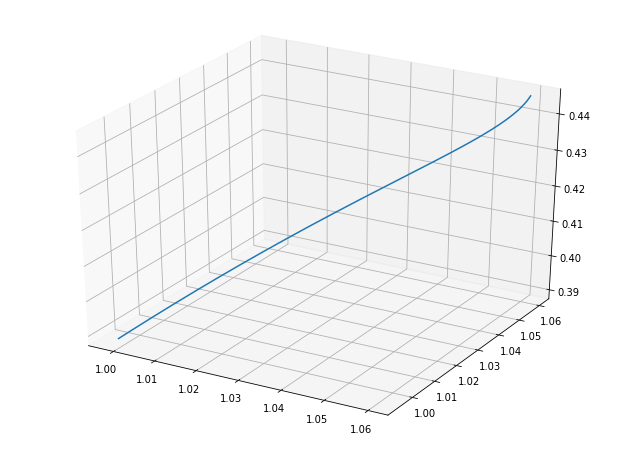

In [273]:
h = 0.001
fig = plt.figure(figsize=(11,8))
y, x = rk4(start(r_s[2]), np.array([0]), func, h, 1000, f_args={"r":r_s[2]})
ax=plt.subplot(projection="3d")
ax.plot(y[:,0], y[:,1], y[:,2])

2.6666666666666665 25.0
8.0


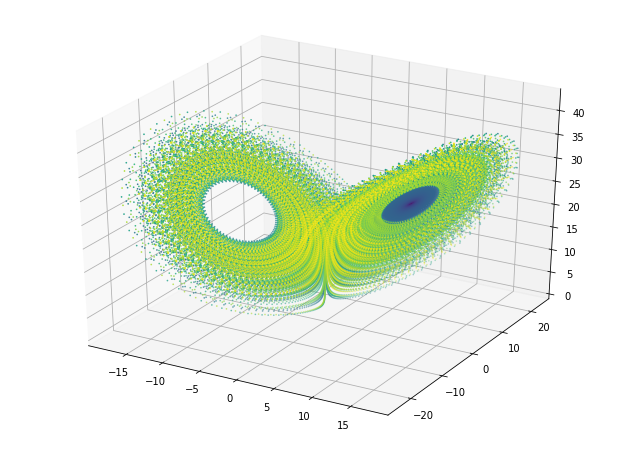

In [294]:
h = 0.01
fig = plt.figure(figsize=(11,8))
r_s = np.array([0.5, 1.17, 1.3456, 25.0, 29.0])
y, x = rk4(start(r_s[3]), np.array([0]), func, h, 100000, f_args={"r":r_s[3]})
ax=plt.subplot(projection="3d")
ax.scatter(y[:,0], y[:,1], y[:,2], c=x, s=0.5)

2.6666666666666665 25.0
8.0


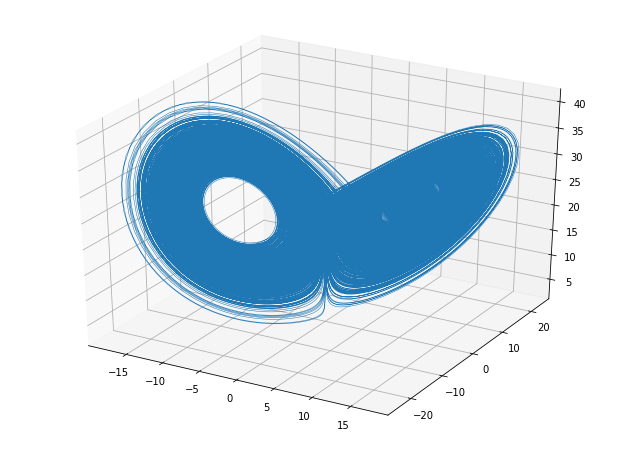

In [293]:
h = 0.01
fig = plt.figure(figsize=(11,8))
r_s = np.array([0.5, 1.17, 1.3456, 25.0, 29.0])
y, x = rk4(start(r_s[3]), np.array([0]), func, h, 100000, f_args={"r":r_s[3]})
ax=plt.subplot(projection="3d")
ax.plot(y[:,0], y[:,1], y[:,2], linewidth=0.5)

2.6666666666666665 29.0
8.640987597877146


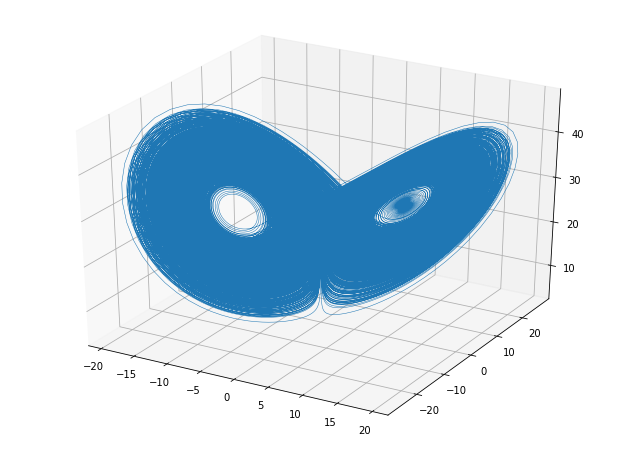

In [276]:
h = 0.01
fig = plt.figure(figsize=(11,8))
r_s = np.array([0.5, 1.17, 1.3456, 25.0, 29.0])
y, x = rk4(start(r_s[4]), np.array([0]), func, h, 100000, f_args={"r":r_s[4]})
ax=plt.subplot(projection="3d")
ax.plot(y[:,0], y[:,1], y[:,2], linewidth=0.5)

2.6666666666666665 29.0
8.640987597877146


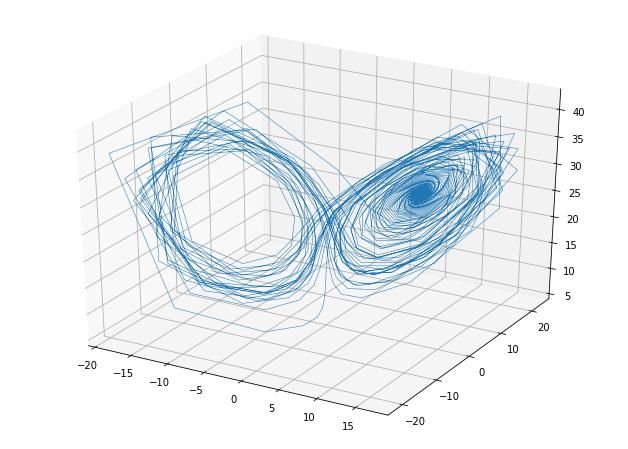

In [281]:
h = 0.09
fig = plt.figure(figsize=(11,8))
y, x = rk4(start(r_s[4]), np.array([0]), func, h, 1000, f_args={"r":r_s[4]})
ax=plt.subplot(projection="3d")
ax.plot(y[:,0], y[:,1], y[:,2], linewidth=0.5)

0.5
0
1.17
1
2.6666666666666665 1.17
0.6733003292241384
1.3456
2
2.6666666666666665 1.3456
0.9599999999999999
25.0
3
2.6666666666666665 25.0
8.0
29.0
4
2.6666666666666665 29.0
8.640987597877146


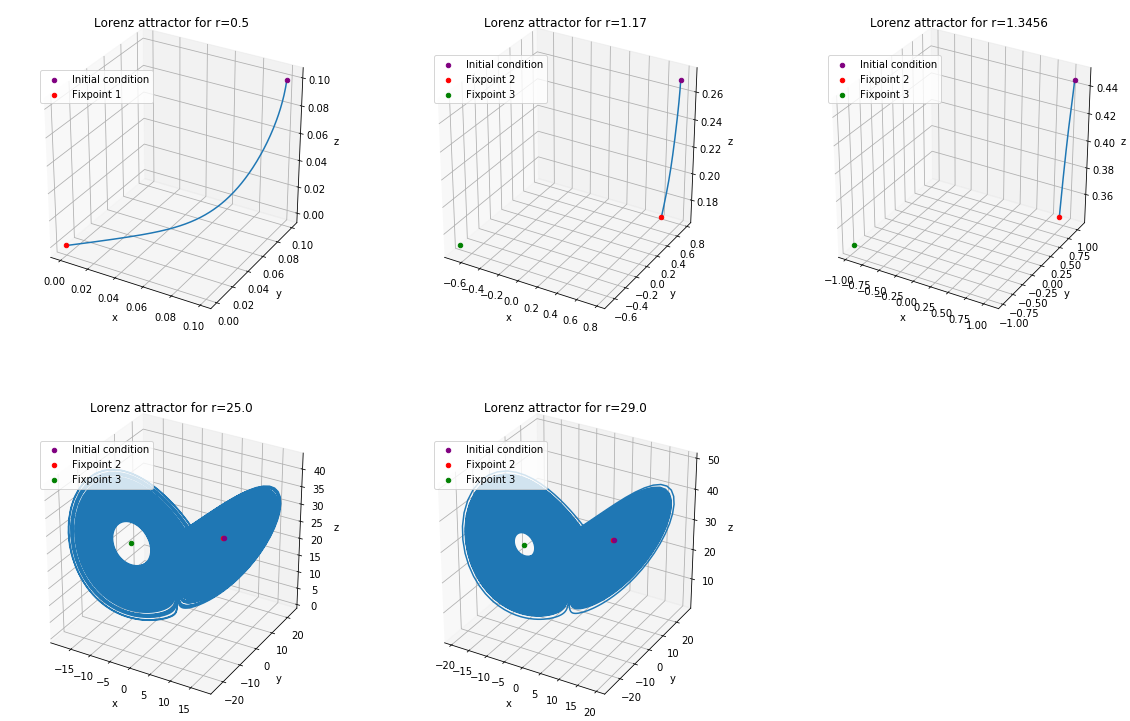

In [305]:
fig = plt.figure(figsize=(20,13))
for n, r in enumerate(r_s):
    print(r)
    print(n)
    y0 = start(r)
    y, x = rk4(y0, np.array([0]), func, h, 100000, f_args={"r":r})
    
    ax = fig.add_subplot(2,3,n+1, projection='3d')
    ax.scatter(y0[0],y0[1],y0[2], label='Initial condition', c="purple")
    
    if r<1:
        ax.scatter(0,0,0, c='red', label='Fixpoint 1')
    if r>1:
        a0=np.sqrt(b*(r-1))
        ax.scatter(a0,a0,r-1, c='red', label='Fixpoint 2')
        ax.scatter(-a0,-a0,r-1, c='green', label='Fixpoint 3')
    
    ax.plot(y[:,0],y[:,1],y[:,2])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(f"Lorenz attractor for r={r}")
    plt.legend(loc=(0.1,0.7))

